# Multi Linear Regression

In [3]:

pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np

In [5]:
car_data=pd.read_csv("Cars.csv")
car_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [6]:
car_data.shape

(81, 5)

In [7]:
car_data.isnull().sum()


HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [8]:
car_data.dtypes


HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [9]:
car_data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## To plot the graph of the one variable "MPG"

C:\Users\91934\AppData\Local\Temp\ipykernel_14064\645551481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data["MPG"])


<Axes: xlabel='MPG', ylabel='Density'>

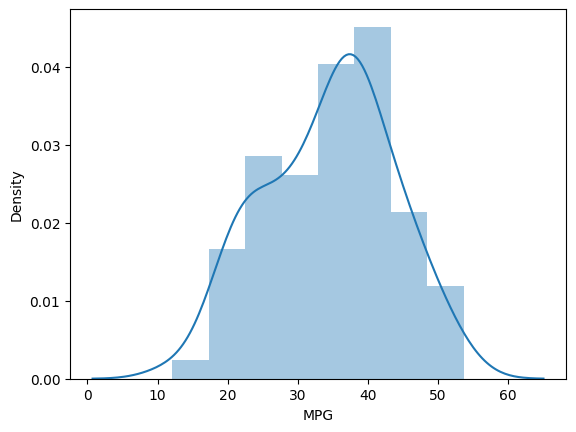

In [10]:
sns.distplot(car_data["MPG"])

# Assumptions:
## 1.To find Linearity Assumption

### To find the linear relationship between y and other input variables

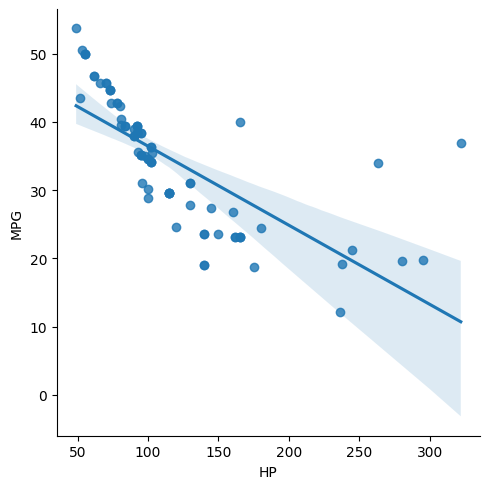

In [11]:
sns.lmplot(data=car_data,x="HP",y="MPG")

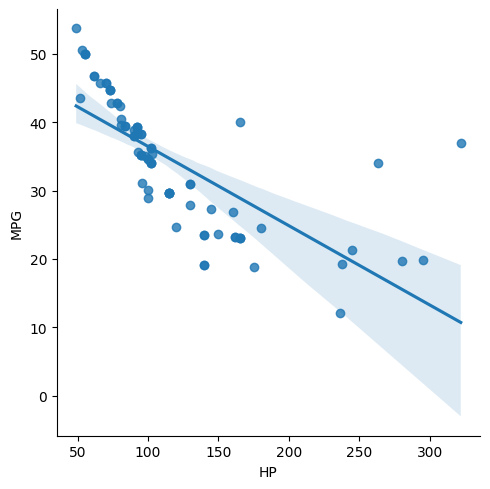

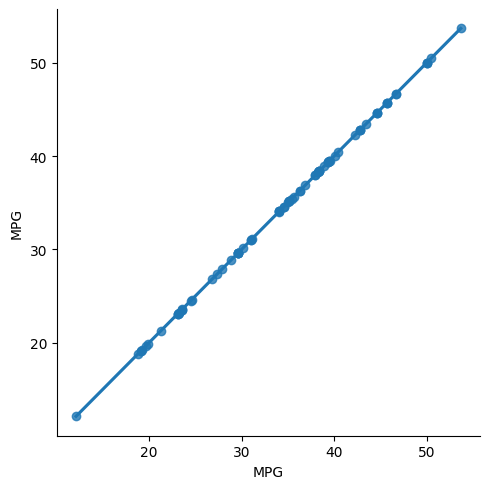

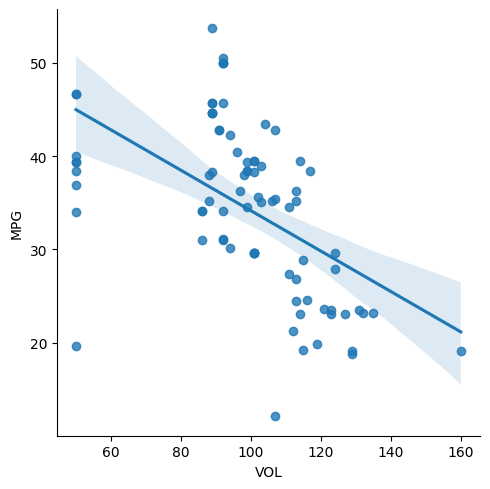

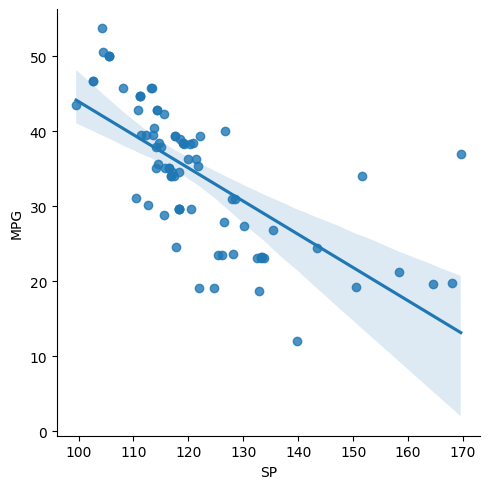

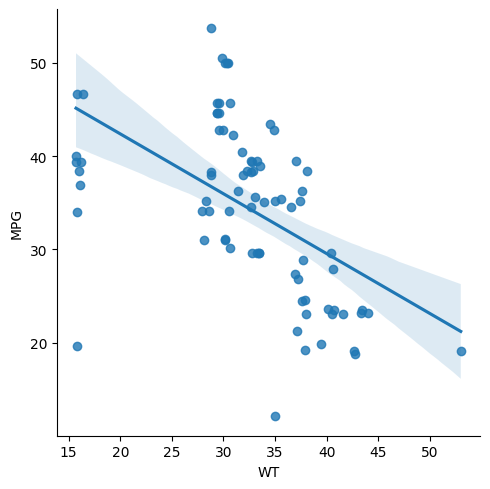

In [12]:
for i in car_data.columns: #it shows the relationship between y and all other variables
    sns.lmplot(data=car_data,x=i,y="MPG")

#### Based on the above result, linearity assumption is failed

# 2.Multi co-Linearity assumption
* There is should not be any linear realtionship between independent input variables

In [13]:
car_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

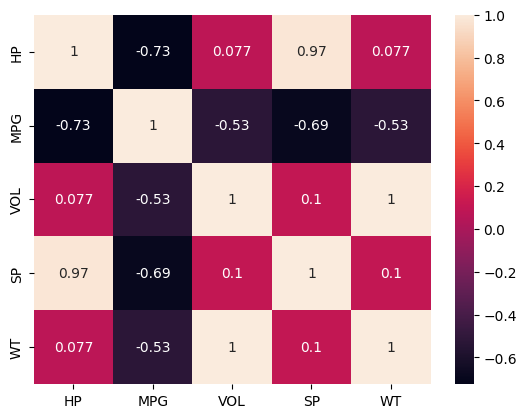

In [14]:
sns.heatmap(car_data.corr(),annot=True)

#### Multi co linearity assumption is also failed

# 3.Auto Regression Assumption:
* There should not be any time dependent data

### This assumption is satisfied or passed

# MODEL BUILDING


* Import the algorithm
* data preparation, separate x and y
* create the instance of the model
* fit the model into the data
* predict the model
* check for the accuracy

### Separating x and y

In [15]:
x=car_data.drop(labels="MPG",axis=1)
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [16]:
y=car_data["MPG"] # result is in series
y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

In [17]:
y=car_data[["MPG"]] # double square brackets will convert into dataframe
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


### Fitting the model into our data

In [18]:
model=LinearRegression() #build the model and trained
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
model.intercept_ #predicted value when independent varibles are zero

array([30.67733585])

In [20]:
model.coef_ #vales of independent variables

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

### Prediction

In [21]:
y_predicted=model.predict(x)


### To check whether the predicted values is correct 

* import the mean_absolute_error and r2_score

In [22]:
mean_absolute_error(car_data["MPG"],
y_predicted)

3.267968285420799

In [23]:
r2_score(car_data["MPG"],
y_predicted)

0.7705372737359844

# 5.Homoscedasticity assumption
* the difference between predicted and actual values) should be roughly the same across all levels of the independent variable. 

In [24]:
error=y-y_predicted
#actual value-predicted value

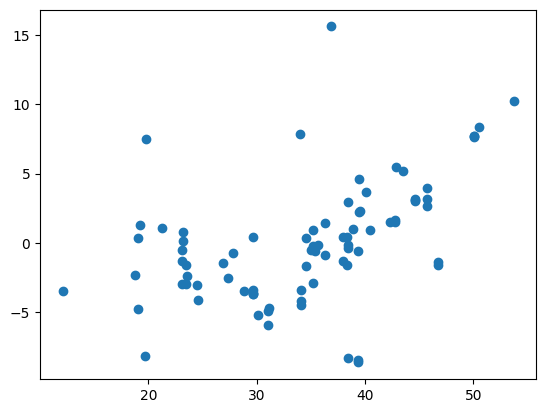

In [25]:
plt.scatter(x=y,y=error)

#### Homoscedasticity assumption is failed because there is no random scatter of points

# 6.Zero residual mean assumption
* indicates a perfect prediction, meaning the model's predicted value matches the actual observed value exactly.

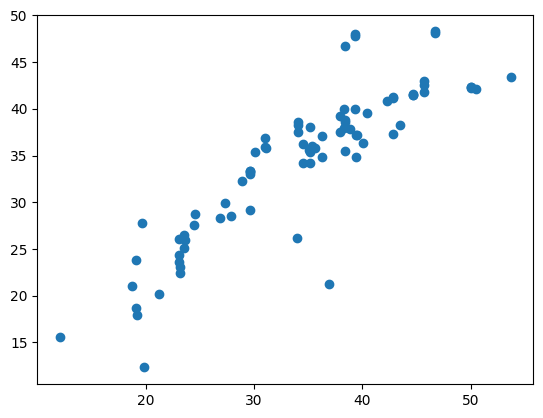

In [26]:
plt.scatter(x=y,y=y_predicted)

#### There is no straight line in the plot, hence this assumption also failed

# StatsModel

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import statsmodels.formula.api as smf

## Model using ordinary least square 

### Model building

In [29]:
model_1=smf.ols(formula="MPG~HP+VOL+SP+WT",data=car_data).fit()
model_1

### Model ready

In [30]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

# Model evaluation

## Which model to build is choosed based on the parameters AIC,BIC,rsquared,rsquared_adjust

* AIC, or Akaike Information Criterion is a metric used to compare the fit of different regression models
* The lower the AIC value, better the model fit

In [31]:
model_1.aic # The Akaike information criterion (AIC) is a metric used to compare the fit of different regression models. 
# The lower the AIC, the better the model fit.


np.float64(477.9279049354879)

* Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models
* The lower the BIC value, better the model fit

In [32]:
model_1.bic # The Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models.
# A lower BIC indicates a better balance between model fit and complexity

np.float64(489.9001507088501)

* R-squared (or the coefficient of determination) is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variable(s) in the model. 

In [33]:
model_1.rsquared# coefficient of determination
# RSS	=	sum of squares of residuals
# TSS	=	total sum of squares
# The Higher the rsquared, the better the model fit. 

np.float64(0.7705372737359842)

* Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a linear regression model
* In general, adjusted R-squared provides a more accurate assessment of a model's predictive power than R-squared, especially when dealing with multiple predictor variables.
* The higher the rsquared value, the better the model fit.

In [34]:
model_1.rsquared_adj#Adjusted R-squared is a modified version of R-squared that adjusts for predictors that are not significant in a regression model.
# A lower adjusted R-squared indicates that the additional input variables are not adding value to the model.
# he Higher the rsquared_adj, the better the model fit. 

np.float64(0.7584602881431413)

In [35]:
model_1=smf.ols(formula="MPG~HP+VOL+SP+WT",data=car_data).fit()
print("AIC",model_1.aic)
print("BIC",model_1.bic)
print("rsquared",model_1.rsquared)
print("r2_adj",model_1.rsquared_adj)

AIC 477.9279049354879
BIC 489.9001507088501
rsquared 0.7705372737359842
r2_adj 0.7584602881431413


In [36]:
model_1=smf.ols(formula="MPG~HP",data=car_data).fit()
print("AIC",model_1.aic)
print("BIC",model_1.bic)
print("rsquared",model_1.rsquared)
print("r2_adj",model_1.rsquared_adj)

AIC 530.7452702659343
BIC 535.5341685752792
rsquared 0.5256806086282022
r2_adj 0.5196765656994453


<Axes: >

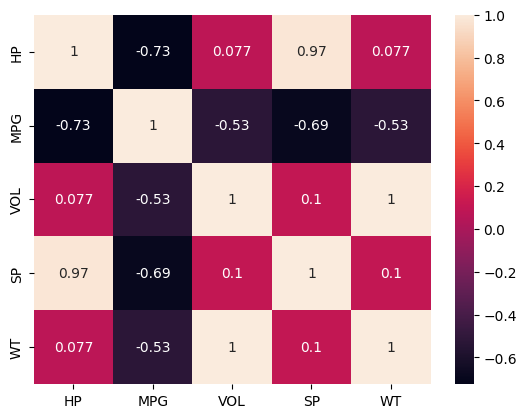

In [37]:
sns.heatmap(car_data.corr(),annot=True)

In [38]:
model_1=smf.ols(formula="MPG~VOL+WT",data=car_data).fit()
print("AIC",model_1.aic)
print("BIC",model_1.bic)
print("rsquared",model_1.rsquared)
print("r2_adj",model_1.rsquared_adj)

AIC 566.3145901819738
BIC 573.4979376459911
rsquared 0.282109561644598
r2_adj 0.2637021145072801


In [39]:
model_1=smf.ols(formula="MPG~HP+VOL",data=car_data).fit()
print("AIC",model_1.aic)
print("BIC",model_1.bic)
print("rsquared",model_1.rsquared)
print("r2_adj",model_1.rsquared_adj)

AIC 480.6569237052377
BIC 487.84027116925506
rsquared 0.7506606277376422
r2_adj 0.7442673105001458


In [40]:
model_1=smf.ols(formula="MPG~HP+SP+WT",data=car_data).fit()
print("AIC",model_1.aic)
print("BIC",model_1.bic)
print("rsquared",model_1.rsquared)
print("r2_adj",model_1.rsquared_adj)

AIC 476.29927501529767
BIC 485.87707163398744
rsquared 0.769482813998346
r2_adj 0.7605016249333465


* rsquared 0.769482813998346 -almost 77% accuracy in the prediction
* To improve the accuracy more, we are going for model optimization by data transformation

# Model optimization

### Data transformation techniques if the data is CONTINUOUS:
Log Transformation

Square Root Transformation

Cube Root Transformation

Reciprocal Transformation

Boxcox Transformation

Standard Scaler

Min Max Scaler

Robust Scaler

### Data transformation techniques if the data is DISCRETE:
Label Encoding

One Hot Encoding

# Log Transformation

In [41]:
cars_df1=car_data.copy() # step1 copied the dataset to a ne name

In [42]:
import numpy as np

In [43]:
cars_df1["log_hp"]=np.log(car_data["HP"])
cars_df1

,HP,MPG,VOL,SP,WT,log_hp
0,49,53.700681,89,104.185353,28.762059,3.891820
1,55,50.013401,92,105.461264,30.466833,4.007333
2,55,50.013401,92,105.461264,30.193597,4.007333
3,70,45.696322,92,113.461264,30.632114,4.248495
4,53,50.504232,92,104.461264,29.889149,3.970292
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552
77,238,19.197888,115,150.576579,37.923113,5.472271
78,263,34.000000,50,151.598513,15.769625,5.572154
79,295,19.833733,119,167.944460,39.423099,5.686975


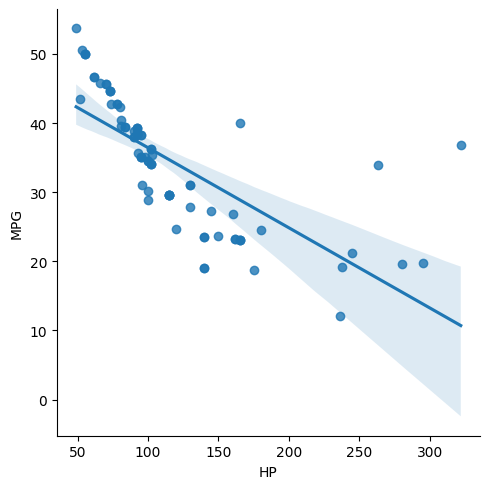

In [44]:
sns.lmplot(data=cars_df1,x="HP",y="MPG")

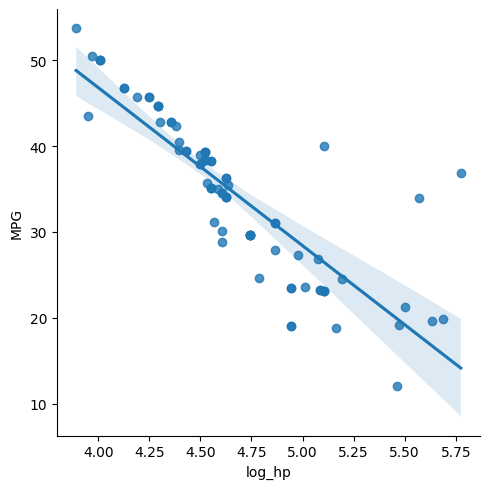

In [45]:
sns.lmplot(data=cars_df1,x="log_hp",y="MPG")

<Axes: >

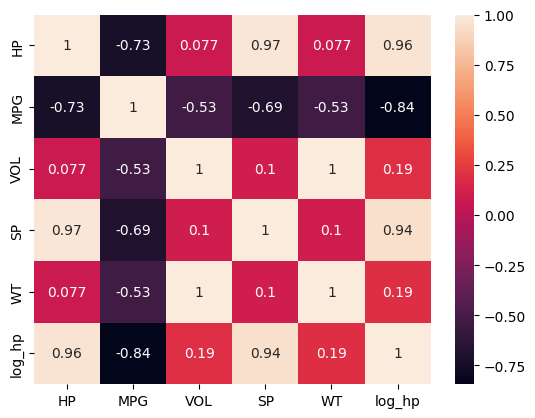

In [46]:
sns.heatmap(cars_df1.corr(),annot=True)

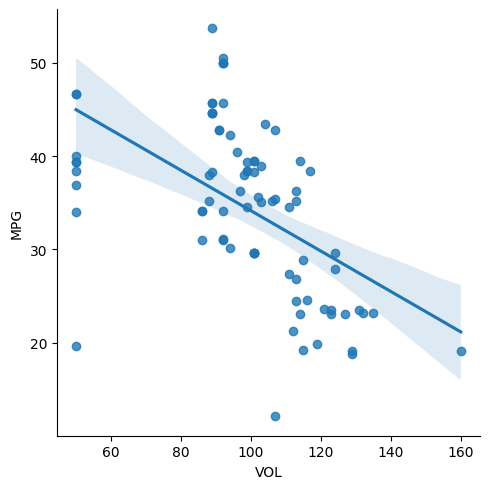

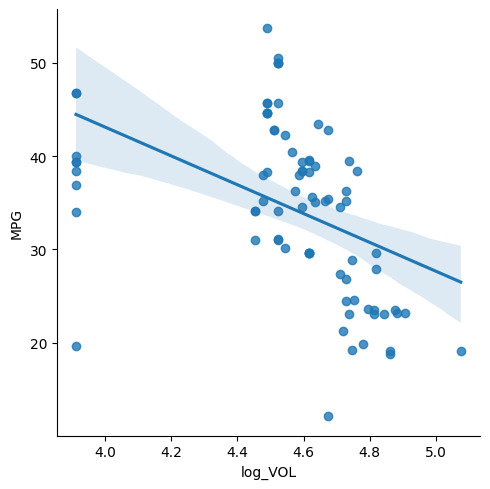

<Axes: >

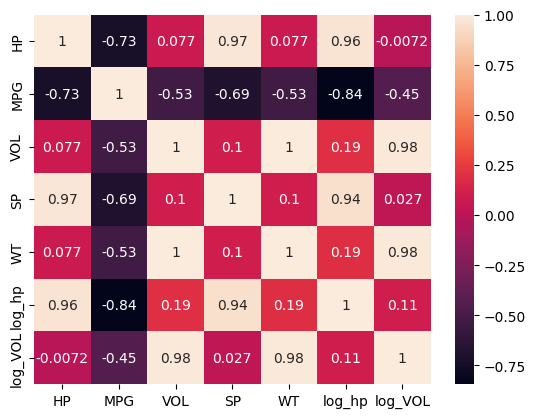

In [47]:
cars_df1["log_VOL"]=np.log(car_data["VOL"])
sns.lmplot(data=cars_df1,x="VOL",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_VOL",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

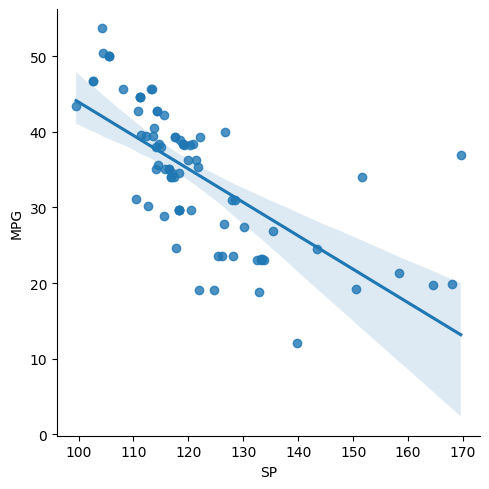

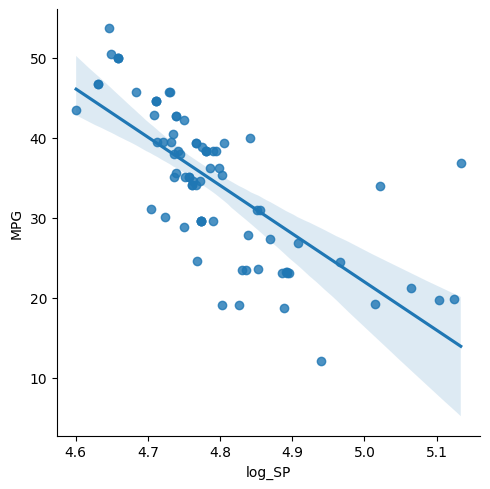

<Axes: >

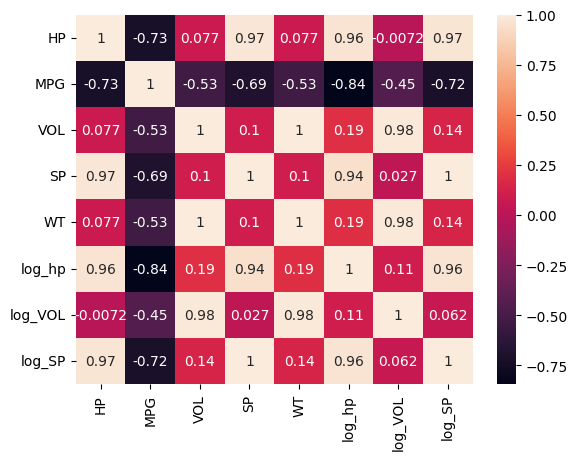

In [48]:
cars_df1["log_SP"]=np.log(car_data["SP"])
sns.lmplot(data=cars_df1,x="SP",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_SP",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

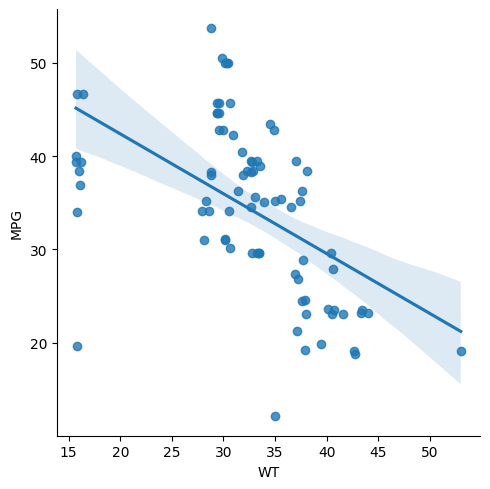

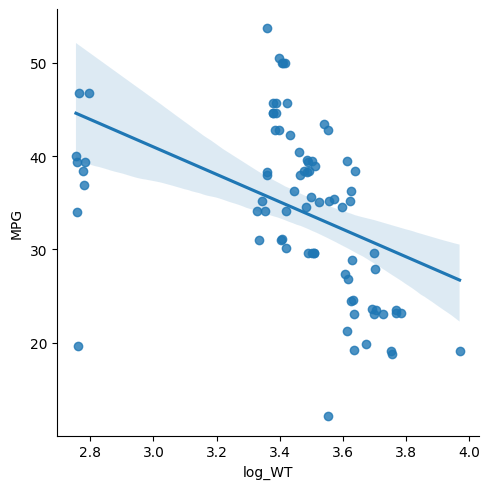

<Axes: >

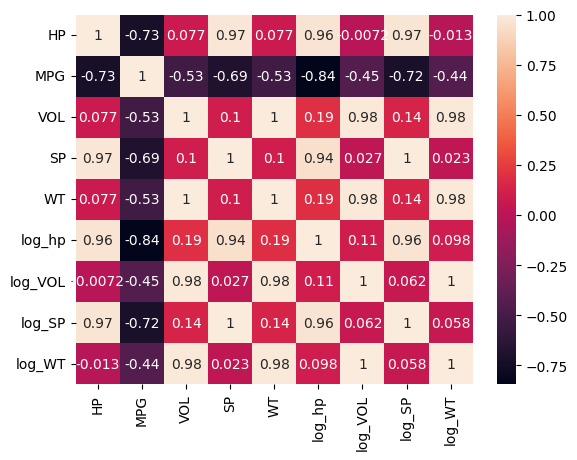

In [49]:
cars_df1["log_WT"]=np.log(car_data["WT"])
sns.lmplot(data=cars_df1,x="WT",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_WT",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

In [50]:
cars_df1

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


#### We are gonna build a new model after the data transformation

If we have strong relationship with y and x then the accuracy will be high(r2 value will be high)

In [51]:
model_2=smf.ols(formula="MPG~HP",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 530.7452702659343
BIC 535.5341685752792
rsquared 0.5256806086282022
r2_adj 0.5196765656994453


In [52]:
model_2=smf.ols(formula="MPG~log_hp",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 490.4986085730722
BIC 495.28750688241706
rsquared 0.7114095515436409
r2_adj 0.7077565078922946


In [53]:
model_2=smf.ols(formula="MPG~VOL",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 564.5634161305575
BIC 569.3523144399023
rsquared 0.27990086511227064
r2_adj 0.27078568618964105


In [54]:
model_2=smf.ols(formula="MPG~log_VOL",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 573.0814921857461
BIC 577.870390495091
rsquared 0.2000491225011476
r2_adj 0.18992316202647852


In [55]:
model_2=smf.ols(formula="MPG~SP",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 539.408199092848
BIC 544.1970974021929
rsquared 0.4721402334141218
r2_adj 0.46545846421683224


In [56]:
model_2=smf.ols(formula="MPG~log_SP",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 532.1442469181513
BIC 536.9331452274962
rsquared 0.5174173348052113
r2_adj 0.5113086934736317


In [57]:
model_2=smf.ols(formula="MPG~WT",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 564.8358142145094
BIC 569.6247125238542
rsquared 0.2774751389270127
r2_adj 0.2683292546096331


In [58]:
model_2=smf.ols(formula="MPG~log_WT",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 573.689208547852
BIC 578.4781068571968
rsquared 0.19402478308187288
r2_adj 0.18382256514620032


<Axes: >

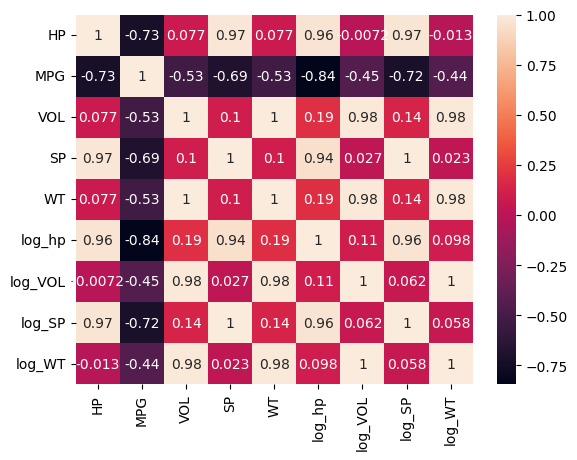

In [59]:
sns.heatmap(cars_df1.corr(),annot=True)

### Combiing two conditions

In [60]:
model_2=smf.ols(formula="MPG~log_hp+VOL+log_SP",data=cars_df1).fit()
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 396.92283101805924
BIC 406.500627636749
rsquared 0.9134805433870518
r2_adj 0.9101096554670668


# Final model

In [61]:
model_F2=smf.ols(formula="MPG~log_hp+VOL+log_SP",data=cars_df1).fit() #final model as r2 accuracy is 91%
print("AIC",model_2.aic)
print("BIC",model_2.bic)
print("rsquared",model_2.rsquared)
print("r2_adj",model_2.rsquared_adj)

AIC 396.92283101805924
BIC 406.500627636749
rsquared 0.9134805433870518
r2_adj 0.9101096554670668


## Model Prediction Testing

In [62]:
y_stats_predicted=model_F2.predict()
y_stats_predicted


array([52.50818905, 48.89204579, 48.89204579, 45.77209264, 49.49863646,
       46.00269867, 48.89204579, 48.34505739, 48.34505739, 42.1673822 ,
       43.17478536, 44.49572302, 40.56747463, 43.17478536, 44.71901609,
       43.17478536, 42.65197164, 44.49572302, 42.65197164, 38.54140709,
       38.70693521, 39.98187783, 38.02881149, 40.26598674, 38.9902486 ,
       42.56295602, 37.26310209, 38.70693521, 44.93563374, 35.28268179,
       36.26784232, 37.2640766 , 35.81801441, 34.52909674, 37.89019993,
       37.01248866, 37.78768951, 35.42894759, 35.42894759, 33.01261744,
       33.91521523, 34.46335254, 34.95573323, 35.86216134, 34.88224977,
       34.47083629, 33.52158852, 34.23523555, 33.51605515, 29.97063887,
       29.97063887, 29.97063887, 28.13223341, 26.75838584, 26.65937872,
       27.40312427, 32.51923734, 29.97063887, 32.25459269, 31.28709897,
       27.52036961, 25.99807277, 23.58982725, 24.25251991, 23.7327376 ,
       29.20735553, 23.8019775 , 22.68552914, 23.02969395, 23.31

In [63]:
mean_absolute_error(car_data["MPG"],
y_stats_predicted)#using statsmodel library after data transformation error is less

1.5953938252580688

In [64]:
mean_absolute_error(car_data["MPG"],
y_predicted)#using sklearn library 


3.267968285420799

### New accuracy of the model is rsquared 0.9134805433870518

# Detecting Influencers/Outliers
1. Cooks Distance
2. High Influence Points
1. Cooks Distance
Cook’s distance, is used in Regression Analysis to find influential outliers in a set of independent
variables.

In other words, it’s a way to identify points that negatively affect your regression model.

The measurement is a combination of each observation’s leverage and residual values.

The higher the leverage and residuals, the higher the Cook’s distance.

Several interpretations for Cook’s distance exist. There isn’t a universally accepted rule for cut off
points.

If you have a lot of points with large Cook's Distance values, that could indicate a problem with
your regression model in general.


#### To improve the accuracy more than this

In [65]:
model_F2_outliers=model_F2.get_influence()
model_F2_outliers

In [66]:
model_F2_outliers.cooks_distance

(array([4.76197795e-03, 2.62846787e-03, 2.62846787e-03, 1.04294457e-05,
        2.26107737e-03, 1.59812312e-04, 2.62846787e-03, 1.10823286e-02,
        1.10823286e-02, 1.78880399e-05, 1.93448992e-03, 7.39214449e-02,
        2.46185959e-03, 1.93448992e-03, 1.12245392e-03, 1.93448992e-03,
        1.80830394e-05, 7.39214449e-02, 1.80830394e-05, 1.08067207e-04,
        6.60294076e-05, 7.65615616e-03, 6.31815538e-05, 2.89601772e-05,
        2.85776752e-04, 5.55441337e-02, 2.31040499e-03, 6.60294076e-05,
        4.43299747e-03, 1.01317646e-05, 8.69872064e-03, 3.07926699e-03,
        9.56689798e-05, 2.55419162e-03, 1.90109801e-03, 4.60195805e-04,
        2.04146288e-05, 1.54893839e-03, 1.54893839e-03, 2.57707249e-03,
        1.05219849e-03, 2.76424037e-04, 4.78715927e-04, 4.89194621e-04,
        3.79790937e-04, 4.32860307e-06, 6.37595958e-04, 3.67242737e-04,
        4.59776823e-03, 1.34975360e-04, 1.34975360e-04, 1.34975360e-04,
        2.51418201e-03, 1.15648190e-02, 3.96639417e-05, 2.123154

In [67]:
dis,_=model_F2_outliers.cooks_distance

In [68]:
dis

array([4.76197795e-03, 2.62846787e-03, 2.62846787e-03, 1.04294457e-05,
       2.26107737e-03, 1.59812312e-04, 2.62846787e-03, 1.10823286e-02,
       1.10823286e-02, 1.78880399e-05, 1.93448992e-03, 7.39214449e-02,
       2.46185959e-03, 1.93448992e-03, 1.12245392e-03, 1.93448992e-03,
       1.80830394e-05, 7.39214449e-02, 1.80830394e-05, 1.08067207e-04,
       6.60294076e-05, 7.65615616e-03, 6.31815538e-05, 2.89601772e-05,
       2.85776752e-04, 5.55441337e-02, 2.31040499e-03, 6.60294076e-05,
       4.43299747e-03, 1.01317646e-05, 8.69872064e-03, 3.07926699e-03,
       9.56689798e-05, 2.55419162e-03, 1.90109801e-03, 4.60195805e-04,
       2.04146288e-05, 1.54893839e-03, 1.54893839e-03, 2.57707249e-03,
       1.05219849e-03, 2.76424037e-04, 4.78715927e-04, 4.89194621e-04,
       3.79790937e-04, 4.32860307e-06, 6.37595958e-04, 3.67242737e-04,
       4.59776823e-03, 1.34975360e-04, 1.34975360e-04, 1.34975360e-04,
       2.51418201e-03, 1.15648190e-02, 3.96639417e-05, 2.12315459e-04,
      

#### To see the outliers ploting it into a graph

<StemContainer object of 3 artists>

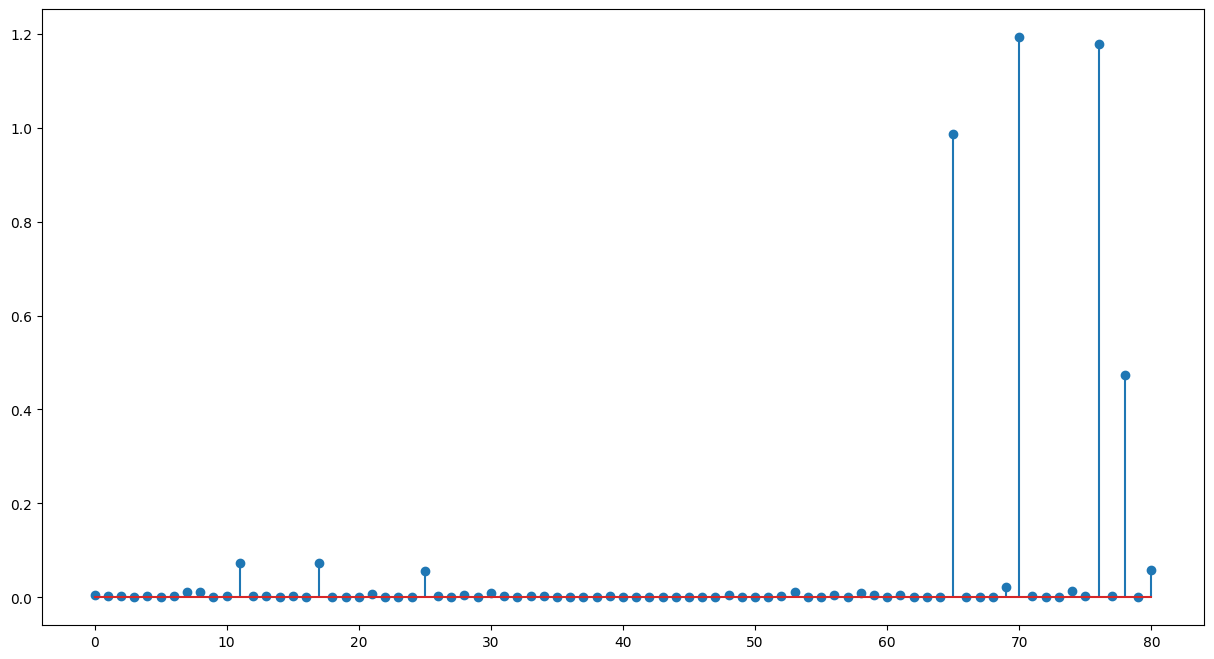

In [69]:
plt.figure(figsize=(15,8))
plt.stem(dis)

#### Add this dis to the actual dataset 

In [70]:
cars_df1["dis"]=dis
cars_df1

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.177456
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.002527
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.472693
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000889


In [71]:
cars_df1.sort_values(by="dis",ascending=False)

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT,dis
70,280,19.678507,50,164.598513,15.823060,5.634790,3.912023,5.103509,2.761468,1.192439
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.177456
65,165,40.050000,50,126.598513,15.712859,5.105945,3.912023,4.841021,2.754479,0.985781
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.472693
17,92,39.354094,50,117.598513,16.194122,4.521789,3.912023,4.767276,2.784648,0.073921
...,...,...,...,...,...,...,...,...,...,...
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
29,103,35.404192,107,121.840817,35.549360,4.634729,4.672829,4.802715,3.570922,0.000010
62,140,23.515917,131,126.048103,43.390988,4.941642,4.875197,4.836664,3.770252,0.000009
68,165,23.103172,123,133.312342,40.472042,5.105945,4.812184,4.892695,3.700611,0.000007


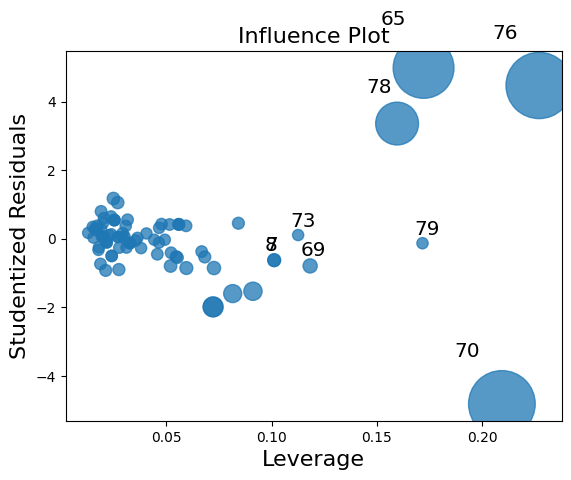

In [75]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_F2)
plt.show()

#### Remove the top 4 outliers

In [77]:
Nods=cars_df1.drop(labels=[70,76,65,78])
Nods

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698,4.941642,4.859812,4.802907,3.752293,0.014300
75,175,18.762837,129,132.864163,42.778219,5.164786,4.859812,4.889327,3.756029,0.002320
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.002527
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000889


In [79]:
model_F2=smf.ols(formula="MPG~log_hp+VOL+log_SP",data=Nods).fit()#getting 98% accuracy
print("AIC",model_F2.aic)
print("BIC",model_F2.bic)
print("rsquared",model_F2.rsquared)
print("r2_adj",model_F2.rsquared_adj)

AIC 232.50088232418526
BIC 241.87610401159998
rsquared 0.9870260995889484
r2_adj 0.9864929255994531


##### Name changing

In [80]:
model_FF=smf.ols(formula="MPG~log_hp+VOL+log_SP",data=Nods).fit()
print("AIC",model_F2.aic)
print("BIC",model_F2.bic)
print("rsquared",model_F2.rsquared)
print("r2_adj",model_F2.rsquared_adj)

AIC 232.50088232418526
BIC 241.87610401159998
rsquared 0.9870260995889484
r2_adj 0.9864929255994531


## Model prediction Testing

In [82]:
y_predicted_Nods=model_FF.predict()
y_predicted_Nods

array([54.24839821, 50.29431005, 50.29431005, 46.57192861, 51.01188385,
       46.57796686, 50.29431005, 45.9816966 , 45.9816966 , 42.53369664,
       43.31420653, 41.32851179, 41.04478144, 43.31420653, 45.1450324 ,
       43.31420653, 42.84630688, 41.32851179, 42.84630688, 39.08288523,
       38.9147144 , 41.19811675, 38.29031799, 40.52108788, 38.35913562,
       39.11575389, 38.80956748, 38.9147144 , 46.83164239, 35.61187682,
       37.46890964, 37.49157382, 35.37093191, 35.27115926, 38.23108962,
       36.9025219 , 36.93010717, 33.97959598, 33.97959598, 31.57784411,
       34.61270268, 34.63830536, 33.95377845, 34.69190549, 34.78719461,
       34.01293186, 33.95806938, 34.09977086, 31.6382633 , 28.94560082,
       28.94560082, 28.94560082, 28.81867937, 26.02039008, 25.98052231,
       27.90745891, 31.20214108, 28.94560082, 31.04567379, 31.74384592,
       26.8556723 , 25.66086871, 24.09745393, 24.16821553, 23.35810871,
       22.77597659, 22.61568348, 22.66573971, 21.79867166, 22.63

In [84]:
mean_absolute_error(car_data["MPG"],
y_predicted)

3.267968285420799

In [85]:
mean_absolute_error(car_data["MPG"],
y_stats_predicted)

1.5953938252580688

In [87]:
mean_absolute_error(Nods["MPG"],
y_predicted_Nods)

0.8076634355409258

### Last 2 assumptions Homoscadesitiy and zero resudial mean 

In [90]:
error_1=Nods["MPG"]-y_predicted_Nods
error_1

0    -0.547717
1    -0.280909
2    -0.280909
3    -0.875606
4    -0.507652
        ...   
74   -2.263620
75   -0.749712
77    0.697231
79    1.159884
80   -0.987145
Name: MPG, Length: 77, dtype: float64

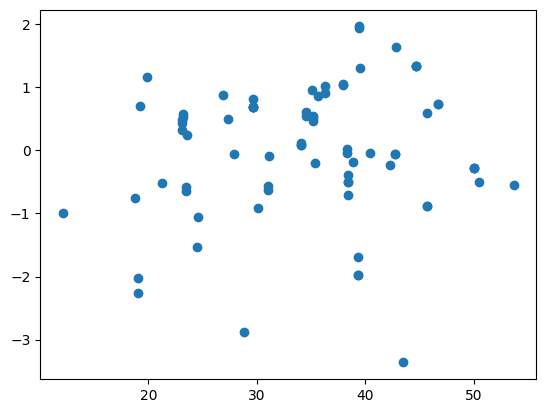

In [91]:
plt.scatter(x=Nods["MPG"],y=error_1)

### The values are scatter below -2 , there should be constant variance (2 to -2)hence this assumption is not passed

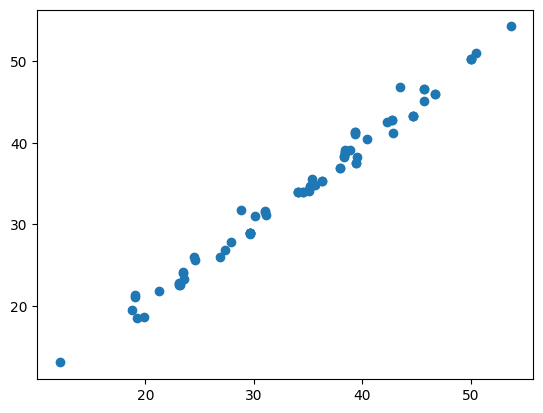

In [92]:
plt.scatter(x=Nods["MPG"],y=y_predicted_Nods)

### The pickle module in Python provides a way to serialize and deserialize Python object structures.
* Pickling is noting but converting the original file into a binary pickle file
* It will be unpickled again by using load function, which means converted from binary to readable file

In [93]:
import pickle
pickle.dump(model_FF, open('Batch_13_model.pkl','wb'))